In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

In [2]:
csv_opts = {'sep': '|',
           'quotechar': '"',
           'compression': 'gzip',
           'encoding': 'utf-8'}

In [3]:
with open('../hand/arrest_dtypes.yaml', 'r') as yamlfile:
        arrest_dtypes = yaml.load(yamlfile)
with open('../hand/encounter_dtypes.yaml', 'r') as yamlfile:
        encounter_dtypes = yaml.load(yamlfile)
with open('../hand/removal_dtypes.yaml', 'r') as yamlfile:
        removal_dtypes = yaml.load(yamlfile)

In [4]:
arrests = pd.read_csv('../input/arrests.csv.gz', **csv_opts, dtype=arrest_dtypes)
encounters = pd.read_csv('../input/encounters.csv.gz', **csv_opts, dtype=encounter_dtypes)
removals = pd.read_csv('../input/removals.csv.gz', **csv_opts, dtype=removal_dtypes)

In [5]:
arrests['apprehension_date'] = pd.to_datetime(arrests['apprehension_date'], format='%m/%d/%Y')
encounters['event_date'] = pd.to_datetime(encounters['event_date'], format='%m/%d/%Y')
removals['departed_date'] = pd.to_datetime(removals['departed_date'], format='%m/%d/%Y')
removals['removal_date'] = pd.to_datetime(removals['removal_date'], format='%m/%d/%Y')

Using date range of AIC report, numbers very close, difference either due to cleaning decisions or possibly records "back-filled" posterior to date of release to AIC.

In [6]:
aic_start = '2016-1-1'
aic_end = '2018-9-23'
print(len(arrests.set_index('apprehension_date').loc[aic_start: aic_end]))
print(len(encounters.set_index('event_date').loc[aic_start: aic_end]))
print(len(removals.set_index('removal_date').loc[aic_start: aic_end]))
print(len(removals.set_index('departed_date').loc[aic_start: aic_end]))

381705
1199704
656077
657686


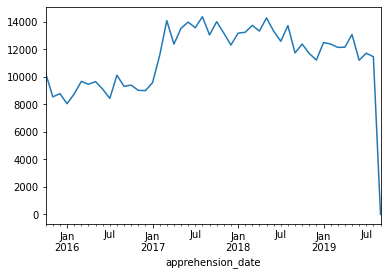

In [7]:
arrests.set_index('apprehension_date').resample('M')['id'].count().plot()

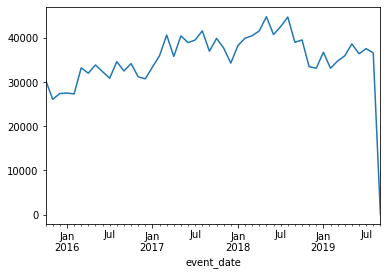

In [8]:
encounters.set_index('event_date').resample('M')['id'].count().plot()

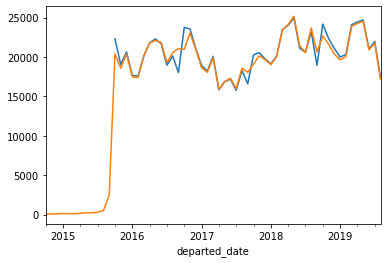

In [9]:
# Relationship between `removal_date` and `departed_date`. Strange.
removals.set_index('removal_date').resample('M')['id'].count().plot()
removals.set_index('departed_date').resample('M')['id'].count().plot()

In [10]:
facil_adp = pd.read_csv('../input/facility_adp_by_fy.csv', index_col=0)

In [11]:
facil_adp.tail()

,ATL,BAL,BOS,BUF,CHI,DAL,DEN,DET,ELP,HOU,...,NYC,PHI,PHO,SEA,SFR,SLC,SNA,SND,SPM,WAS
fy14_adp,2156,299,580,538,1481,1002,491,537,2167,3873,...,991,1042,3317,1520,743,484,6972,1158,440,784
fy15_adp,1798,247,418,454,1116,795,426,346,2011,2324,...,962,894,2868,1248,687,415,6163,1370,311,715
fy16_adp,2110,264,555,608,1436,921,493,529,2469,3269,...,1393,1019,4006,1540,969,556,7940,1610,432,763
fy17_adp,3232,289,670,641,1602,979,721,850,3094,3248,...,1501,1083,3724,1574,961,506,7212,1789,660,883
fy18_adp,3501,326,768,633,1625,1153,649,1116,2561,2674,...,1707,1088,3715,1531,1048,485,8407,1787,803,899


In [12]:
t = ['2008-10-01',
'2009-10-01',
'2010-10-01',
'2011-10-01',
'2012-10-01',
'2013-10-01',
'2014-10-01',
'2015-10-01',
'2016-10-01',
'2017-10-01']

In [13]:
facil_adp.index = t
facil_adp.index = pd.to_datetime(facil_adp.index)

In [14]:
# Percent change in ADP FY16-FY18
aor_facil_change = (facil_adp.T['2017-10-01'] - facil_adp.T['2015-10-01']) / facil_adp.T['2015-10-01'] * 100
aor_facil_change

ATL     65.924171
BAL     23.484848
BOS     38.378378
BUF      4.111842
CHI     13.161560
DAL     25.190011
DEN     31.643002
DET    110.964083
ELP      3.726205
HOU    -18.201285
LOS      4.526275
MIA      5.561224
NEW     -0.098522
NOL     11.907866
NYC     22.541278
PHI      6.771344
PHO     -7.264104
SEA     -0.584416
SFR      8.152735
SLC    -12.769784
SNA      5.881612
SND     10.993789
SPM     85.879630
WAS     17.824377
dtype: float64

In [15]:
# Total ADP % change FY16-FY18
total_facil_change = (facil_adp.T['2017-10-01'].sum() - facil_adp.T['2015-10-01'].sum()) / facil_adp.T['2015-10-01'].sum() * 100
total_facil_change

10.04292898319637

In [16]:
aor_facil_change < total_facil_change

ATL    False
BAL    False
BOS    False
BUF     True
CHI    False
DAL    False
DEN    False
DET    False
ELP     True
HOU     True
LOS     True
MIA     True
NEW     True
NOL    False
NYC    False
PHI     True
PHO     True
SEA     True
SFR     True
SLC     True
SNA     True
SND    False
SPM    False
WAS    False
dtype: bool

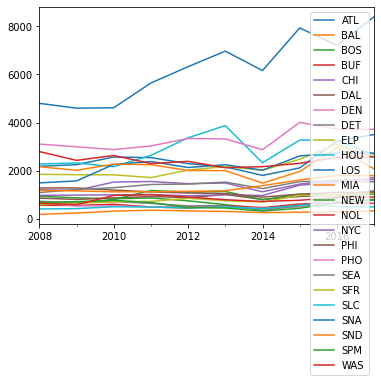

In [17]:
facil_adp.plot(stacked=False, legend=True)

In [18]:
facil_adp.mean().sort_values(ascending=False)

SNA    6267.6
PHO    3295.5
HOU    2813.9
ATL    2461.0
NOL    2422.3
LOS    2213.7
ELP    2152.0
MIA    2116.1
CHI    1415.3
SEA    1385.2
SND    1340.8
NYC    1143.8
PHI    1104.2
NEW     921.0
DAL     914.9
WAS     811.6
SFR     788.0
BOS     720.6
DET     662.8
SPM     591.7
BUF     549.3
DEN     547.7
SLC     468.1
BAL     281.2
dtype: float64

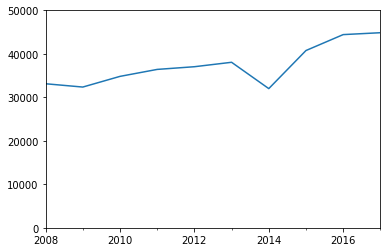

In [19]:
facil_adp.T.sum().plot(ylim=(0,50000))

In [20]:
facil_adp_subset = facil_adp.loc['2015':'2017']

In [21]:
arrests_by_aor_fy = arrests.set_index('apprehension_date').groupby([pd.Grouper(freq='AS-OCT'), 'aor'])['id'].count()

In [22]:
arrests_by_aor_fy = arrests_by_aor_fy.unstack()

In [23]:
arrests_by_aor_fy_subset = arrests_by_aor_fy.loc['2015':'2017']

In [24]:
facil_adp_subset.index = ['FY16 ADP',
                          'FY17 ADP',
                          'FY18 ADP']

In [25]:
arrests_by_aor_fy_subset.index = ['FY16 Arrests',
                          'FY17 Arrests',
                          'FY18 Arrests']

In [26]:
data = facil_adp_subset.T.join(arrests_by_aor_fy_subset.T)

In [27]:
fys = ['FY16',
       'FY17',
       'FY18']

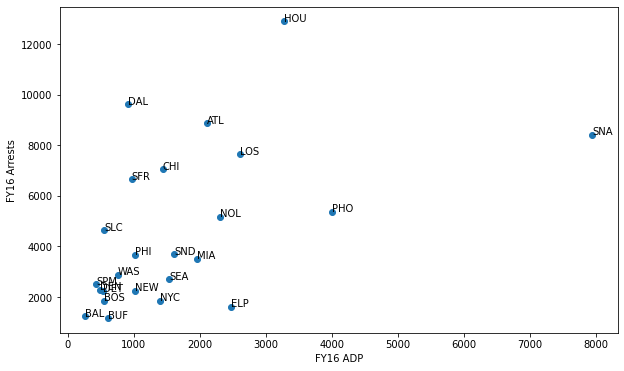

In [28]:
x=f'FY16 ADP'
y=f'FY16 Arrests'

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=x, y=y, data=data)
plt.xlabel(x)
plt.ylabel(y)

for i, txt in enumerate(data.index):
    plt.annotate(txt, (data[x][i], data[y][i]))

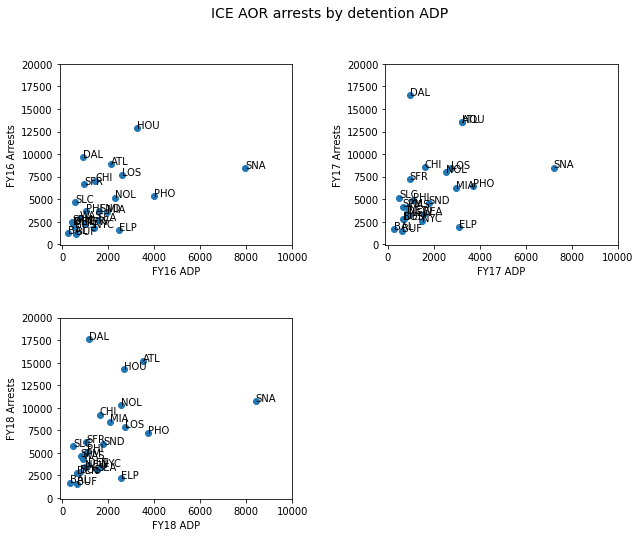

In [29]:
fig = plt.figure(figsize=(10,8))
i = 0

for fy in fys:
    x=f'{fy} ADP'
    y=f'{fy} Arrests'

    ax=plt.subplot(2,2,i+1)
    ax.scatter(x=x, y=y, data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.ylim(-100, 20000)
    plt.xlim(-100, 10000)

    i = i+1
    for j, txt in enumerate(data.index):
        plt.annotate(txt, (data[x][j], data[y][j]))

plt.suptitle(f'ICE AOR arrests by detention ADP', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

In [30]:
aor_arrest_change = (arrests_by_aor_fy.T['2017-10-01'] - arrests_by_aor_fy.T['2015-10-01']) / arrests_by_aor_fy.T['2015-10-01'] * 100

In [31]:
len(aor_arrest_change)

25

In [32]:
len(aor_facil_change)

24

In [33]:
aor_arrest_change = aor_arrest_change.drop('HQ')

In [34]:

txt = list(aor_arrest_change.index)

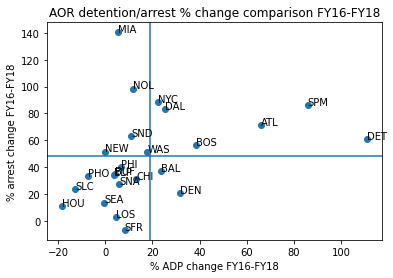

In [35]:
x = list(aor_facil_change)
y = list(aor_arrest_change)
names = list(aor_arrest_change.index)

plt.scatter(x=x, y=y)
plt.xlabel('% ADP change FY16-FY18')
plt.ylabel('% arrest change FY16-FY18')
plt.title('AOR detention/arrest % change comparison FY16-FY18')
plt.axhline(aor_arrest_change.mean())
plt.axvline(aor_facil_change.mean())

for i, txt in enumerate(names):
    plt.annotate(txt, (x[i], y[i]))

In [36]:
aor_facil_change.min()

-18.201284796573873

In [37]:
aor_arrest_change.min()

-6.630581867388363

In [39]:
removals.columns

Index(['aor', 'apprehension_date', 'processing_disposition_code',
       'citizenship', 'gender', 'rc_threat_level', 'final_charge_section',
       'departed_date', 'removal_date', 'id'],
      dtype='object')

In [43]:
removals['removal_date'] = pd.to_datetime(removals['removal_date'])
# removals['apprehension_date'] = pd.to_datetime(removals['apprehension_date'])
# removals['departed_date'] = pd.to_datetime(removals['departed_date'])

In [48]:
g = removals.set_index('removal_date').groupby([pd.Grouper(freq='AS-OCT'), 'citizenship'])

In [60]:
data = g['id'].count().unstack()

In [78]:
data_change = (data.T['2017-10-01'] - data.T['2015-10-01']) / data.T['2015-10-01'] * 100

In [85]:
data_change = data_change.replace([np.inf, -np.inf], np.nan)
data_change = data_change.dropna()

In [87]:
data_change.sort_values()

citizenship
SWAZILAND         -100.00
SEYCHELLES        -100.00
CAYMAN ISLANDS    -100.00
ANGUILLA          -100.00
OMAN              -100.00
                   ...   
GUINEA            1268.75
AZERBAIJAN        1300.00
SUDAN             1300.00
GAMBIA            5450.00
SOUTH SUDAN       6000.00
Length: 186, dtype: float64

In [93]:
data_change.loc['SOMALIA']

15.656565656565657